# Project: Patients No_Show Appointment Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset is a record of medical appointment in Brazil. it contains 100k medical appointment data and i'll be looking to determine a partner based on the dataset. A description of the dataset is contained in the column names which can be explained as follows:

* `Patient_ID` is the unique Identifier for each patient.
* `Appointment_ID` is the unique appointment identifier.
* `Scheduled_Day` tells us on what day the patient set up their appointment.
* `appointment_Day` tells us the appointment date.
* `Neighborhood` indicates the location of the hospital.
* `Scholarship` indicates whether or not the patient is enrolled in Brasilian welfare program


### Question(s) for Analysis

1) Are patients more likely to turn up for an appointment if its free?

2) Does gender influence chances of a patient showing up ?

3) What's the Scholarship distribution across both genders and how does it affect them?

4) Are Older patients more likely to show up for an appointment?

5) How does Gender, Schoolarship and Age of the patient effect turn up for an appointment?

6) Does reminding patients about an appointment increase the chance of showing up?

7) Illnesses and its effect on patients turn up

8) Could the increase attendance from Patients with hypertension be as a result of funding?

In [1]:
#importing packages for this project
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as snb 
%matplotlib inline 
import datetime as dt


<a id='wrangling'></a>
## Data Wrangling
To make this dataframe clean and ready for analysis, wrangling operations have to be undertaking.
Here, i'll:

1) check for null values

2) check for data type conformity

3) check for duplicated data

4) Rename the column name in line with PEP 8


In [2]:
# to load the data and preview it's first 5 rows
appointment = pd.read_csv('../data/noshowappointments-kagglev2-may-2016.csv')
appointment.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Checking for null values in the dataframe
appointment.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

This output indicates that there's no null values in any dataset in the dataframe.

In [4]:
#to find out number of duplicated rows in the dataset
appointment.duplicated().sum()

0

The dataframe seems to be clear of duplicated rows. nice:)

In [5]:
#to check for data type conformity
appointment.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

The '.dtypes' call function shows that some columns have the wrong datatype. this will affect computation and calculation going forward, so most be addressed

In [6]:
#to get a general description of the full dataframe
appointment.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From the output table above, it's observed that 'Age' has a minimum value of '-1'. this cant be true. and most be corrected. 
This correction, data type unconformity, column names not in line with PEP 8 standards and finally irrelevant columns (patient_Id and Appiontment_id) will be fixed in the data cleaning subsection.

First, we create a copy of the dataset. working with a copy of the dataset is best practice as allows the original dataset retain it's original structure.


### Data Cleaning: 
First, we create a copy of the dataset. working with a copy of the dataset is best practice as allows the original dataset retain it's original structure


In [7]:
df = appointment.copy()

Data cleaning processes to be applied here includes:

1) Changing column names to match PEP 8 standards.

2) Changing 'Scheduled_day' and 'Appointment_day' datatypes to match their content.

3) Removal of irrelevant datasets like 'Patient_Id' and 'Appointment_Id'.

4) Then fixing the issue of '-1' as the min age in the 'Age' column.

5) Let's change the 'No_show' column content from 'yes','no' to '1','0'. This will make for easy computation. 

In [8]:
# changing column names
# i'll be renaming the 'No_show' column to Show. 
labels =['Patient_ID', 'Appointment_ID', 'Gender', 'Scheduled_day', 'Appointment_day', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Show']
df = pd.read_csv('../data/noshowappointments-kagglev2-may-2016.csv', header=0, names=labels)
df.head()

,Patient_ID,Appointment_ID,Gender,Scheduled_day,Appointment_day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
# to remove the irrelevant columns
df.drop(['Patient_ID', 'Appointment_ID'], axis = 1, inplace = True)
df.head()

,Gender,Scheduled_day,Appointment_day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
#changing Scheduled_day and Appointment_day datatype to timestamps
df['Scheduled_day'] = pd.to_datetime(df['Scheduled_day'])
df['Appointment_day'] = pd.to_datetime(df['Appointment_day'])
print(df.dtypes)

df.head()

Gender                          object
Scheduled_day      datetime64[ns, UTC]
Appointment_day    datetime64[ns, UTC]
Age                              int64
Neighbourhood                   object
Scholarship                      int64
Hipertension                     int64
Diabetes                         int64
Alcoholism                       int64
Handcap                          int64
SMS_received                     int64
Show                            object
dtype: object


,Gender,Scheduled_day,Appointment_day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
# removing the time in the datetime column ('Scheduled_day') to match the 'Appointment_day' column
df['Scheduled_day'] = pd.to_datetime(df['Scheduled_day'].dt.date)
df['Appointment_day'] = pd.to_datetime(df['Appointment_day'].dt.date)
df.head()

,Gender,Scheduled_day,Appointment_day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
# Extracting the 'Year','Month' and 'day' from Date Column.
df['scheduled_month'] = df['Scheduled_day'].dt.month_name()
df['scheduled_day'] = df['Scheduled_day'].dt.day_name()

df['appointment_month'] = df['Appointment_day'].dt.month_name()
df['appointment_day'] = df['Appointment_day'].dt.day_name()


In [13]:
# converting the month and day columns to interger values as this is a ML project
df['scheduled_month'] = df['scheduled_month'].replace(['January', 'February', 'March', 'April', 'May', 'June', 
'July', 'August', 'September', 'October', 'November', 'December'], ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])
df['scheduled_day'] = df['scheduled_day'].replace(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday'], ['1', '2', '3', '4', '5', '6', '7'])

df['appointment_month'] = df['appointment_month'].replace(['January', 'February', 'March', 'April', 'May', 'June', 
'July', 'August', 'September', 'October', 'November', 'December'], ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])
df['appointment_day'] = df['appointment_day'].replace(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday'], ['1', '2', '3', '4', '5', '6', '7'])



In [53]:
# to remove the irrelevant columns
df.drop(['Appointment_day', 'Scheduled_day'], axis = 1, inplace = True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,scheduled_month,scheduled_day,appointment_month,appointment_day,Age_groups
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,1,4,6,4,6,aged
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,1,4,6,4,6,aged
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,1,4,6,4,6,aged
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,4,6,4,6,child
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,1,4,6,4,6,aged


In [14]:
# changing strings value ('yes','no') in 'No_show to int values ('0','1')
# with this, every '1' value in the 'show' dataset indicates that the patient showed up
# and '0' means the patient didnt.
df['Show'].mask(df['Show'] == 'No', 1, inplace=True)
df['Show'].mask(df['Show'] == 'Yes', 0, inplace=True)
df.head(20)

,Gender,Scheduled_day,Appointment_day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,scheduled_month,scheduled_day,appointment_month,appointment_day
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,4,6,4,6
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,4,6,4,6
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,4,6,4,6
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,4,6,4,6
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,4,6,4,6
5,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,1,4,4,4,6
6,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,0,4,4,4,6
7,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,0,4,4,4,6
8,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,1,4,6,4,6
9,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,1,4,4,4,6


In [15]:
# changing the datatype of 'show' to reflect it's new content and ease computation
df.Show = df.Show.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Gender             110527 non-null  object        
 1   Scheduled_day      110527 non-null  datetime64[ns]
 2   Appointment_day    110527 non-null  datetime64[ns]
 3   Age                110527 non-null  int64         
 4   Neighbourhood      110527 non-null  object        
 5   Scholarship        110527 non-null  int64         
 6   Hipertension       110527 non-null  int64         
 7   Diabetes           110527 non-null  int64         
 8   Alcoholism         110527 non-null  int64         
 9   Handcap            110527 non-null  int64         
 10  SMS_received       110527 non-null  int64         
 11  Show               110527 non-null  int32         
 12  scheduled_month    110527 non-null  object        
 13  scheduled_day      110527 non-null  object  

Finally, to fix the min Age error. I'll have to identify the row with '-1' as it's value and drop it from the dataset. To identify this row, i'll have to query the 'age' dataset for that value.

In [16]:
df.query('Age =="-1"')

,Gender,Scheduled_day,Appointment_day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,scheduled_month,scheduled_day,appointment_month,appointment_day
99832,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,1,6,2,6,2


The output shows that row '99832' is the erroneous row.

In [17]:
#dropping the erroneous 'Age' data using the '.drop' function
df.drop([99832], axis=0, inplace=True)

In [18]:
# check to confirm drop 
df.query('Age == "-1"')

,Gender,Scheduled_day,Appointment_day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,scheduled_month,scheduled_day,appointment_month,appointment_day


The empty columns output confirms that the row has been dropped. Now, the datatype of 'Age' has to be changed back to 'int'.

<a id='eda'></a>
## Exploratory Data Analysis
Here, I'll be using python powerful tools like: pandas, numpy, matplotlib to run analysis, find patterns and visulaize relationships with the goal of addressing the research questions posed in the introduction section. 

### 1) Are patients more likely to turn up for an appointment if its free?

The dataframe shows that some patients got funding whilst other didn't. We are going to see how 'scholarship' affects the turn up (Show') level of patients. To achieve this, first we group 'Scholarship' dataset and 'No_show' dataset. Then calculate for the mean values.  

In [19]:
# grouping 'scholarship' and 'Show' and finding the sum of 'show' based on 'Scholarship'
df_s = df.groupby('Scholarship')['Show'].mean()
df_s

Scholarship
0    0.801926
1    0.762637
Name: Show, dtype: float64

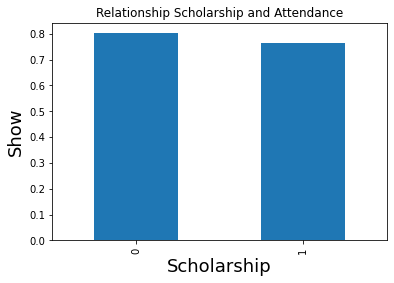

In [20]:
# to reduce code repetitions, a function will be created 
# to be called on for 2 datasets plots.
def plot(df, xlabel, ylabel, title):
    df.plot(kind='bar', title=title)
    plt.xlabel("{}".format(xlabel), fontsize=18)
    plt.ylabel("{}".format(ylabel), fontsize=18)
    plt.legend;
    plt.show()

plot(df_s, 'Scholarship', 'Show', 'Relationship Scholarship and Attendance')

To put this grouping into visual contest, i'll be making a 1-D and 2-D plots of the '.mean()' above.

Interestingly, the above depiction shows that patients without free appointments are more likely to show up than those with free appointment.

### 2) Does gender influence chances of a patient showing up ?

To check for the statistical relationship between 'Gender' and 'No_show', we calculate the sum of a grouping for both datasets.

In [21]:
# using groupby to group 'Gender' and 'No_show'. then use the '.mean()' function to find the mean.
df_GS = df.groupby('Gender')['Show'].mean()
df_GS

Gender
F    0.796851
M    0.800321
Name: Show, dtype: float64

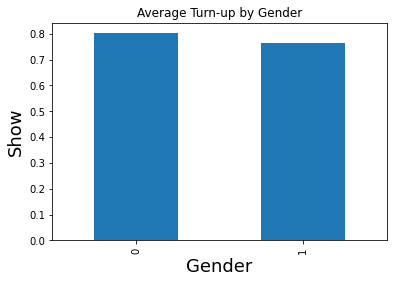

In [22]:
# viusalizing the '.mean()' report
plot(df_s, 'Gender', 'Show', 'Average Turn-up by Gender')

The visual output above shows there's no substantial difference between female turn up and male turn up when we consider the average. 
In the next question we'll check to see how the two genders equate in terms of scholariships and how this affects their chances of showing up for an appointment.

### 3) What's the Scholarship distribution across both genders and how does it affect them?

In [23]:
# first lets find the mean scholarship in terms of 'Gender'
df_GSc = df.groupby('Gender')['Scholarship'].mean()
df_GSc

Gender
F    0.123234
M    0.051904
Name: Scholarship, dtype: float64

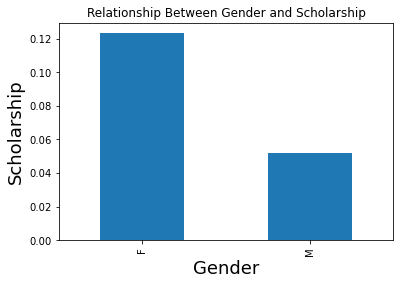

In [24]:
plot(df_GSc, 'Gender', 'Scholarship', 'Relationship Between Gender and Scholarship')

Apparently, more females are on scholarship than males. Next, we merge this with the 'Show' dataset.

In [25]:
#combining the 'gender' and 'scholarship' data with the 'show' data
df_GSS = df.groupby(['Gender', 'Scholarship'])['Show'].mean()
df_GSS

Gender  Scholarship
F       0              0.801734
        1              0.762115
M       0              0.802257
        1              0.764940
Name: Show, dtype: float64

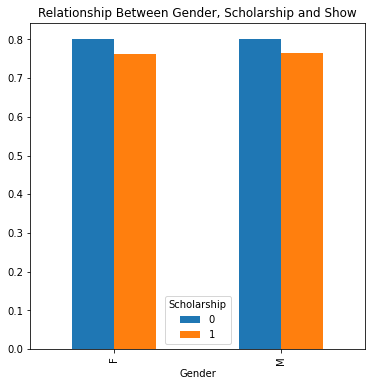

In [26]:
df_GSS.unstack().plot(kind='bar', title='Relationship Between Gender, Scholarship and Show', figsize=(6,6));

This shows that scholarship isn't really a factor in determining if a patient will show up for an appointment.

In the next question we'll try spliting the gender into different "age groups" to get a clearer picture of how different age groups react to medical appoint. Let's see.

### 4) Are Older patients more likely to show up for an appointment?

To analyze this question. we will be looking at the relationship between and independent variable 'Age' and a dependent Variable 'No_show'.

In [27]:
# first, we need to create 'Age groups' for easy analysis. 
#this will be done by using the '.describe()' to get the 'min', '25%', '50%', '75%' and 'max' values.
df.Age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [28]:
#using pandas_cut function 
#create the bin_edges that will be used to cut the data into groups.
bin_edges = [-1.0, 18.0, 37.0, 55.0, 115.0]

#create labels for the new categories.
bin_names = ['child', 'youth', 'adult', 'aged']

# puting the pandas_cut function to use
df['Age_groups'] = pd.cut(df['Age'], bin_edges, labels=bin_names)

# checks for the successful creation of 'Age_group' column
df.head()

,Gender,Scheduled_day,Appointment_day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,scheduled_month,scheduled_day,appointment_month,appointment_day,Age_groups
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,4,6,4,6,aged
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,4,6,4,6,aged
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,4,6,4,6,aged
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,4,6,4,6,child
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,4,6,4,6,aged


The output shows a new last column 'Age_group' added to the dataframe.

In [29]:
#to group the dataframe by 'age group' and 'Show' 
df_AS = df.groupby('Age_groups')['Show'].mean()
df_AS

Age_groups
child    0.780122
youth    0.764624
adult    0.804690
aged     0.843550
Name: Show, dtype: float64

To put this grouping into visual contest, i'll be making a 2-D plots of the '.mean()' above.

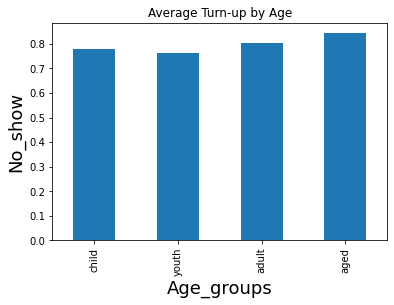

In [30]:
#visualizing the above data
plot(df_AS, 'Age_groups', 'No_show', 'Average Turn-up by Age')

The visuals above shows that Patients within the youth category are less likely to show up for an appointment, whilst patients in the 'aged' category are most likely to show up for an appointment.

### 5) How does Gender, Schoolarship and Age of the patient effect turn up for an appointment?

In [31]:
df_GSA = df.groupby(['Scholarship', 'Gender','Age_groups'])['Show'].mean()
df_GSA

Scholarship  Gender  Age_groups
0            F       child         0.782044
                     youth         0.767762
                     adult         0.809491
                     aged          0.840578
             M       child         0.783754
                     youth         0.767894
                     adult         0.807463
                     aged          0.852131
1            F       child         0.754717
                     youth         0.749210
                     adult         0.768698
                     aged          0.814433
             M       child         0.763043
                     youth         0.673820
                     adult         0.805970
                     aged          0.845361
Name: Show, dtype: float64

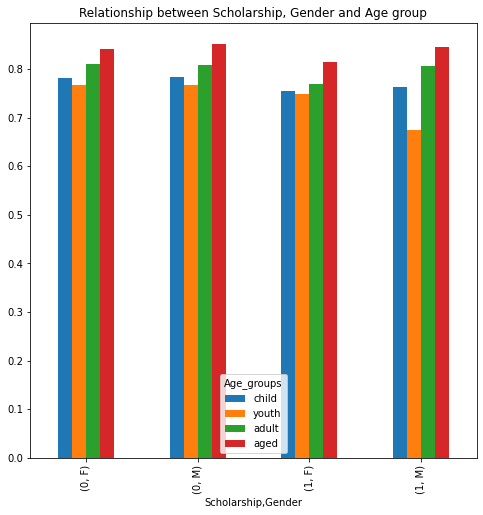

In [32]:
#visualizing the above data
df_GSA.unstack().plot(kind='bar', title='Relationship between Scholarship, Gender and Age group', figsize=(8,8));

This visualization clearly shows that scholarship doesn't determine if patients will show up for an appointment. Patients without scholarship tend to show up more than patients with scholarship. Also, in line with previous insights, 'aged' patients are more likely to show up than other age groups.


### 6) Does reminding patients about an appointment increase the chance of showing up?

To tackle this question, we'll group 'sms_recieved' and 'show' together using the '.groupby' function and calculate the mean.

In [33]:
# grouping by 'sms_received' so as to check the show up
df_sms = df.groupby('SMS_received')['Show'].mean()
df_sms

SMS_received
0    0.832965
1    0.724255
Name: Show, dtype: float64

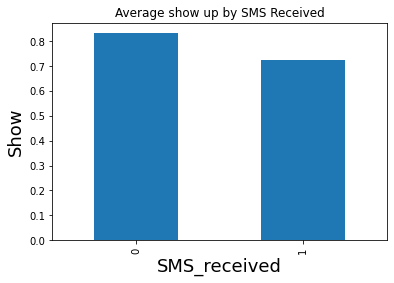

In [34]:
plot(df_sms, 'SMS_received', 'Show', 'Average show up by SMS Received')

This visualization shows that patients who didnt get an sms showed up more for their appointments than those who recieved. so Showing up for an appointment isnt dependent on SMS recieved.

### 7) Illnesses and its effect on patients turn up

let's see how serious hypertensive patients took they appointments 

In [35]:
# getting the number of unique values in hypertensive dataset
df.Hipertension.nunique()

2

In [36]:
# grouping the Hypertensive dataset with the 'show' dataset
df_HS = df.groupby('Hipertension')['Show'].mean()
df_HS

Hipertension
0    0.790961
1    0.826980
Name: Show, dtype: float64

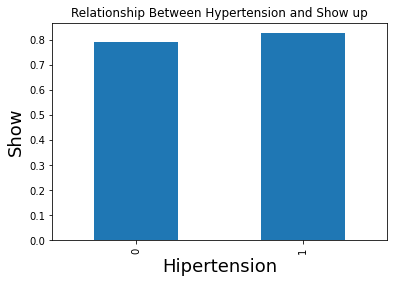

In [37]:
#plotting the output above
plot(df_HS, 'Hipertension', 'Show', 'Relationship Between Hypertension and Show up')

The visualization shows that patients with hypertension are less likely to show up for a medical appointment than those without Hypertension. let's see if they are less sponsored, maybe that explains why?


In [38]:
# lets group 'Hypertension' and 'scholarship' together
df_HSc = df.groupby('Hipertension')['Scholarship'].mean()
df_HSc

Hipertension
0    0.101178
1    0.086418
Name: Scholarship, dtype: float64

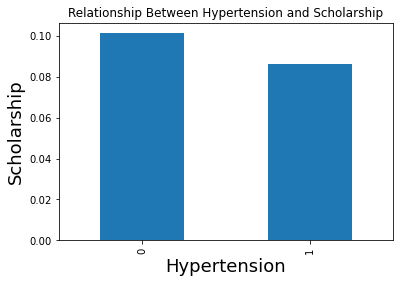

In [39]:
plot(df_HSc, 'Hypertension', 'Scholarship', 'Relationship Between Hypertension and Scholarship')

This visulaization shows the relationship between Hypertension and scholarship. It shows that hypertensive patients received less scholarship than patients without hypertension. 

In [40]:
# grouping hypertension and scholarship with show
df_HSS = df.groupby(['Hipertension', 'Scholarship'])['Show'].mean()
df_HSS

Hipertension  Scholarship
0             0              0.795092
              1              0.754261
1             0              0.829292
              1              0.802548
Name: Show, dtype: float64

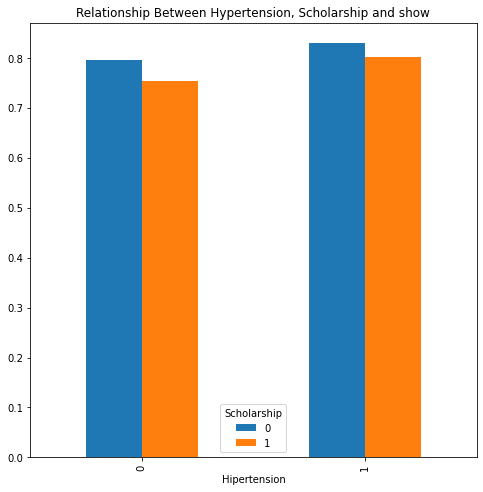

In [41]:
#plotting visuals for the data output above
df_HSS.unstack().plot(kind='bar', title='Relationship Between Hypertension, Scholarship and show', figsize=(8,8));

This bar shows:

a) Non-Hypertensive patients without funding are more likely yo show up than Non-Hypertensive patients with funding.

b) Non-Hypertensive patients without funding are less likely to show up than Hypertensive patients with funding.

c) Hypertensive patients without funding are more likely to show up than Hypertensive patients with funding.

It, shows that while hypertensive patients are more likely to show up than Non-Hypertensive patients, scholarhsip alone doesn't gather more show ups.

lets see how serious Diabetic patients took they appointments.

In [42]:
# getting the number of unique values in Diabetes
df.Diabetes.nunique()

2

In [43]:
# grouping diabetes with show, so we can find the mean show up
df_DS = df.groupby('Diabetes')['Show'].mean()
df_DS

Diabetes
0    0.796370
1    0.819967
Name: Show, dtype: float64

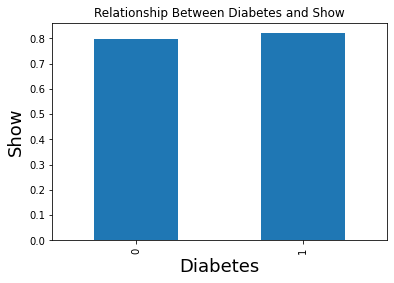

In [44]:
# visualizing the output data
plot(df_DS, 'Diabetes', 'Show', 'Relationship Between Diabetes and Show')

The visualization shows that patients with Diabetes are more likely to show up for a medical appointment. let's see if they are more sponsored, maybe that could be a factor?

Could the increase attendance from Patients with Diabetes be as a result of funding?

In [45]:
# lets group 'Diabetes' and 'scholarship' together
df_DSc = df.groupby('Diabetes')['Scholarship'].mean()
df_DSc

Diabetes
0    0.100329
1    0.071635
Name: Scholarship, dtype: float64

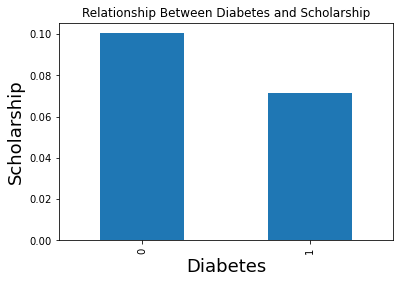

In [46]:
# visualizing the output above
plot(df_DSc, 'Diabetes', 'Scholarship', 'Relationship Between Diabetes and Scholarship')

The above visualization shows that patients with no funding are more likely to attend an appointment, whilst funded patients are less likely. 

 Let's put it all together. diabetes, scholarship and show

In [47]:
#grouping Diabetes, Scholarship and Show together
df_DSS = df.groupby(['Diabetes', 'Scholarship'])['Show'].mean()
df_DSS

Diabetes  Scholarship
0         0              0.800262
          1              0.761465
1         0              0.822756
          1              0.783831
Name: Show, dtype: float64

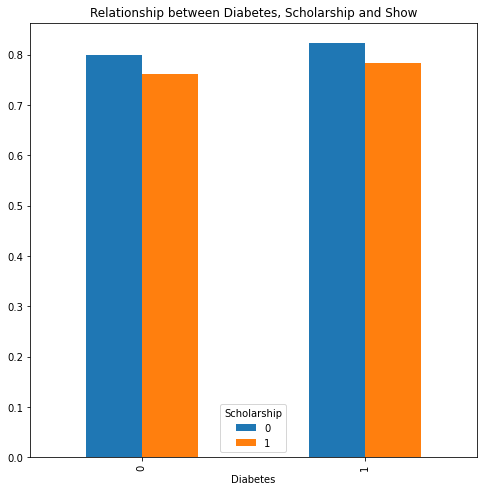

In [48]:
# visualizing the output
df_DSS.unstack().plot(kind='bar', title='Relationship between Diabetes, Scholarship and Show', figsize=(8,8));

This output shows:
    
a) Non-diabetic patients on scholarship are less likely to show up than Non-diabetic patients without scholarship. showing than scholarship isnt a factor for Non-diabetic show up.

b)Non-diabetics with no scholarship are less likely to show up than Diabetics with no scholarship. showing that Diabetics are genereally more likely to show.

c)Diabetics with no scholarship are more likely to sch than Diabetics with scholarship. this also shows that scholarship isnt a factor in diabetic show up.

In [49]:
#Putting the diabetic and hypertensive data together.
df_DHS = df.groupby(['Diabetes', 'Hipertension'])['Show'].mean()
df_DHS

Diabetes  Hipertension
0         0               0.790782
          1               0.828208
1         0               0.801647
          1               0.824083
Name: Show, dtype: float64

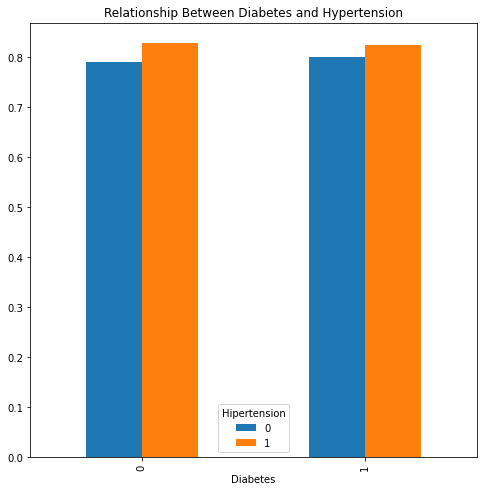

In [50]:
# visualizing the data
df_DHS.unstack().plot(kind='bar', title='Relationship Between Diabetes and Hypertension', figsize=(8,8));

This shows:

a) Hypertensive patients are more likely to turn up than Diabetic Patient.

<a id='conclusions'></a>
## Conclusions

From the analysis done through the questions answered, it shows the following:

a) Gender is a factor in determining show up; females are more likely than males

b) Aged patients are most likely to show up than other age groups.

C) Though Diabetic patients are more likely to show up than Non-diabetic patients, Hypertensive patients are more likely to show up than the patients with diabetes.

d) Scholarship and SMS isn't a factor in determining patients show up.

### Limitations
1) Dropping values due to errors can always skew analysis. Though the number of dropped rows here are minute in comparison to the total data used.

2) The data set summaries health conditions in "1" and "0" format, giving no  consideration for different severity of health conditions and this can go a long way in justifying committment to appointment.


In [51]:
# from subprocess import call
# call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

In [52]:
df.to_csv('../data/preprocessed.csv', index=False)